<a id='top'></a>
![FH Kiel, enjoy the North!](Images/fachhochschule-kiel-logo.svg)
### "Portfolio-Exam Part I"
    MADS-MMS - WS 2021/2022
    Jannik Paul - 940134

## Table of Contents
- **[Exercise 1:](#1.) Data Acquisition and Initial Data Analysis**
    - [ 1.1.](#1.1.) What do the rows of the dataset represent?
    - [ 1.2.](#1.2.) How many different instances does the dataset contain?
    - [ 1.3.](#1.3.) How many attributes (columns) are in the dataset?
    - [ 1.4.](#1.4.) What is the standard deviation of the feature num_likes?
- **[Exercise 2:](#2.) k-Means Clustering on the Plain Data**
    - [2.1.](#2.1.) Which features of the dataset do *not* suggest themselves as features in a clustering analysis? For each of these features, briefly state why you exclude them.
    - [2.2.](#2.2.) For the next tasks, restrict Dataset 𝐴 to the following features: *num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas*. We will call this Dataset 𝐵. On 𝐵, compute k-means clusterings of the dataset using different choices for 𝑘 : 2, 3, . . . , 10. Use a seed of 1 to make the experiments reproducible. For each 𝑘 compute the silhouette coefficient and plot it against 𝑘 in a diagram. Interpret the diagram!
    - [2.3.](#2.3.) Create a silhouette plot for the 𝑘 with the highest silhouette coefficient in the previous experiment. Interpret the diagram!
    - [2.4.](#2.4.) For the same 𝑘, create a plot of the data where you use only the two features num_reactions and num_likes as the axes. Use color to distinguish instances from different clusters. Also highlight the cluster centroids of the k-means clustering. Interpret the diagram, considering only the above two features. Is there a clear clustering structure visible?
- **[Exercise 3:](#3.) Scaling and Feature Selection**
    - [3.1.](#3.1.) Describe in your own words, what the class VarianceThreshold is used for and explain why looking at a feature’s variance is meaningful.
    - [3.2.](#3.2.) The features of the dataset are in different ranges. To be able to compare by variance we should scale the data first. Which is the better choice for the variance threshold method: Min-Max-Scaling or the Standard-Scaler (z-score transformation)? Explain your answer.
    - [3.3.](#3.3.) Use Min-Max-Scaling on Dataset 𝐵 to yield Dataset 𝐶 and rerun the above experiments on 𝐶 (k-means clusterings for 𝑘 “ 2, 3, . . . , 10, silhouette plot for the best 𝑘, plot of clustered data and centroids). How does that compare to the previous experiments?
    - [3.4.](#3.4.) Use the variance threshold method for feature selection on the scaled data to restrict the features further. Set the variance threshold to 0.005. Which features does the resulting dataset (Dataset 𝐷) include, what is their variance (computed on the scaled features)?
    - [3.5.](#3.5.) Repeat the experiments from above on Dataset 𝐷 (k-means clusterings for 𝑘 = 2, 3, . . . , 10, silhouette plot for the best 𝑘, plot of clustered data and centroids). Compare the outcome to the previous experiments.
    - [3.6.](#3.6.) Compare the feature distributions over the clusters for features num_reactions, num_likes, and num_shares. Use violin plots for the original data (the unscaled values) and interpret your results.
- [**Sources**](#Sources)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1.'></a>
# Exercise 1 [<font size="2">back to top</font>](#top)

In [2]:
# Data Acquisition and Initial Data Analysis

In [3]:
# read Dataset_A.csv
Dataset_A = pd.read_csv('Dataset_A.csv')

In [4]:
# 1.1. Checking out rows
Dataset_A.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# Checking out the unique status_type.
Dataset_A['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### 1.1. <a id='1.1.'></a>[<font size="2">back to top</font>](#top)
The rows of the dataset represent Facebook posts, which are of 4 exclusive types: 
- A video, a photo, a link, or just a status. 
- They contain: 
    - Date and time published,
    - number of reactions,
    - metrics on the type of the reactions, spec.: likes, loves, wows, et cetera,
    - number of comments,
    - the number of direct shares. 
- The last 4 columns are empty.

In [6]:
# Instances and Columns
Dataset_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### 1.2. <a id='1.2.'></a>[<font size="2">back to top</font>](#top)
- The dataset contains 7050 instances, indexed from 0 to 7049. 

### 1.3. <a id='1.3.'></a>[<font size="2">back to top</font>](#top)
- The dataset contains 16 columns, indexed 0 to 15. 
- For all columns of indices 12, 13, 14 and 15 we confirmed with .info() that they are completely empty.

In [7]:
np.std(Dataset_A['num_likes'])

449.4404784535229


### 1.4. <a id='1.4.'></a><a id='ref1'></a>[<font size="2">back to top</font>](#top)
- The standard deviation is 449.4404784535229.
- We use .std() from numpy, it is normalized by N. The .std() from pandas is normalized by N-1. 
- pandas thus leads to a slightly different result.
- The difference in results between the different delta degrees of freedom of 0 and 1 get larger with a small dataset <85 samples, so here it is of less importance.

[[1]](#Sources)

# Exercise 2 <a id='2.'>[<font size="2">back to top</font>](#top)

In [8]:
# k-Means Clustering on the Plain Data

In [9]:
Dataset_A.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


### 2.1. <a id='2.1.'></a>[<font size="2">back to top</font>](#top)
- We would exclude *status_id*, *status_type*, *status_published*, and *Column1* to *Column4*.
    - status_id: This is the index.
    - status_type: Is not numeric. We can't cluster how far is a video from a post. We could put this data e.g. into 4 boolean columns, so after some feature engineering they'd be usable, but not in the current form.
    - status_published: This is the datetime of the post/instance. But the distance inbetween dates may not be relevant for correlations between the different features. Could be used with some feature engineering if we sorted the dates into their respective weekdays and then see how close they are, like that to type, e.g. if Friday evening there are more likes, et cetera, but not in the current form.
    - The empty 4 columns at the back.


## 2.2. <a id='2.2.'></a>[<font size="2">back to top</font>](#top)

In [10]:
# Restricting to the features requested and calling this Dataset_B.
Dataset_B = Dataset_A.loc[:, ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas']]

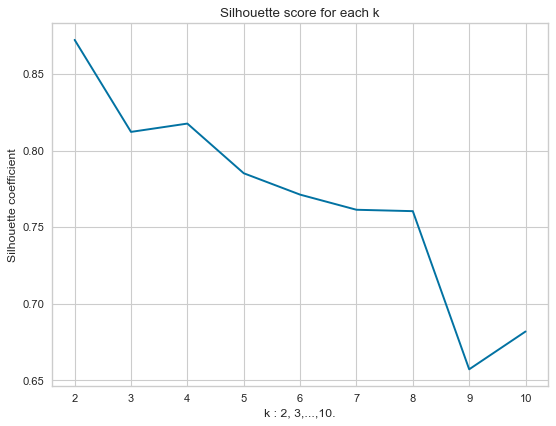

In [11]:
# The function to build the graph was displayed to us in the ex_07_2_k_means_iris example by Prof. Doerfel.
silhouette = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit_predict(Dataset_B)
    silhouette_coefficient = silhouette_score(Dataset_B, kmeans.labels_,metric='euclidean')
    silhouette.append(silhouette_coefficient)
    
plt.figure(figsize = (8, 6), dpi = 80)  
plt.plot(range(2,11), silhouette)
plt.title("Silhouette score for each k")
plt.xlabel("k : 2, 3,...,10.")
plt.ylabel("Silhouette coefficient")
#plt.savefig('Images/Silhouette_score_each_k_2-2.png', bbox_inches='tight')
plt.savefig('Images/Silhouette score each k 2_2.pdf')
plt.show()

- The highest coefficient can be seen at k=2, so it is the best result.
- k=3 and k=4 are still fairly okay, but we see a drop off beyond that.

## 2.3. <a id='2.3.'></a>[<font size="2">back to top</font>](#top)

In [12]:
def plot_silhouette(kmeans, df_B, title, filename):
    colors=['blue', 'green', 'yellow']
    
    plt.figure(figsize=(8, 8))
    X_sub=df_B
    y_pred = kmeans.fit_predict(X_sub)
    
    visualizer = SilhouetteVisualizer(kmeans, colors=colors, is_fitted=True)
    visualizer.fit(X_sub)        # Fit the data to the visualizer
    visualizer.finalize()
    plt.savefig(f'Images/Silhouette score-{filename}.pdf')
    print(f'Silhoutte score: {visualizer.silhouette_score_}')
    visualizer.show()        # Finalize and render the figure

In [13]:
df_B = Dataset_B.to_numpy()

Silhoutte score: 0.8721940910132095


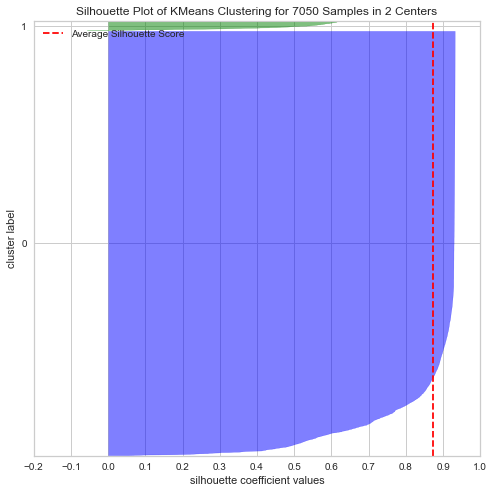

In [14]:
kmeans=KMeans(n_clusters=2, random_state=1)
plot_silhouette(kmeans, df_B, 'k=2', 'Dataset_B 2_3')

<a id='ref2'></a>
- The silhouette plot is useful to see cluster imbalance. We see that cluster 0 is clearly dominating with a much higher score due to the much wider silhouette than cluster 1. Cluster 1 also falls short of the average silhouette score (0.87219..), so it is less cohesive in its distribution. Cluster 1 may even have some samples assigned to it that should belong into cluster 0, as displayed by the negative dip.

[[2]](#Sources)

## 2.4. <a id='2.4.'>[<font size="2">back to top</font>](#top)

In [15]:
def plot_clusters_with_centers(kmeans, df_B, index_x, index_y, title, filename):
    colors=['blue', 'green', 'dodgerblue']
    plt.figure(figsize=(8, 8))
    X_sub=df_B #df_B[:,[index_x, index_y]]
    y_pred = kmeans.fit_predict(X_sub)
    for i in range(0,len(np.unique(y_pred))):
        plt.scatter(X_sub[y_pred==i, index_x], X_sub[y_pred==i, index_y], c=colors[i], label=i, s=10)

    plt.scatter(
        kmeans.cluster_centers_[:, index_x], 
        kmeans.cluster_centers_[:, index_y],
        s=350, marker='*', c='yellow', edgecolor='black'
    )
    plt.title("K-Means diagram, colors differentiated, cluster centroids highlighted")
    #plt.legend()
    plt.xlabel("feature space, number of reactions")
    plt.ylabel("feature space, number of likes")
    plt.savefig(f'Images/K-Means diagram-{filename}.pdf')
    plt.show()

    #visualizer = SilhouetteVisualizer(kmeans, colors=colors, is_fitted=True)

    #visualizer.fit(X_sub)        # Fit the data to the visualizer
    #visualizer.finalize()
    #plt.savefig(f'Images/Silhouette score-{filename}.pdf')
    #print(f'Silhoutte score: {visualizer.silhouette_score_}')
    #visualizer.show()        # Finalize and render the figure

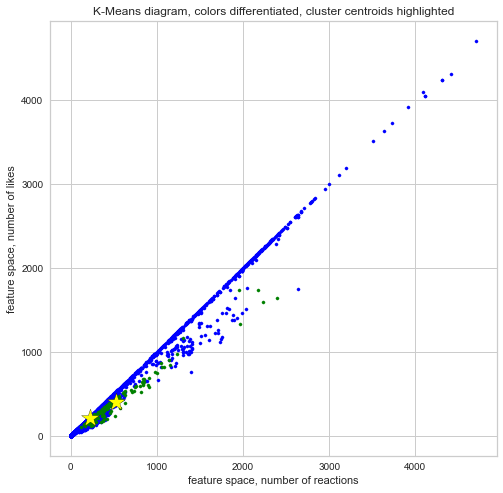

In [16]:
kmeans=KMeans(n_clusters=2, random_state=1)
plot_clusters_with_centers(kmeans, df_B, 0, 3, ' k=2', 'Dataset_B 2_4')

- After way too many tries I settled with sklearn/the lecture's, I also tried a lot around with clarans and others.
- Here we recognize that we do not see well separated clusters, as they are somewhat merged. The outliers at the bottom are mixed, both clusters seem to be pretty close in their center. There seems to be some work to do to unwrap this comet. All we can see is that we have a near linear distribution of quite a few samples, especially with more than approximately 750 of either one.

# Exercise 3  <a id='3.'>[<font size="2">back to top</font>](#top)

In [17]:
# Scaling and Feature Selection

## 3.1. <a id='3.1.'></a> <a id='ref3'></a>[<font size="2">back to top</font>](#top)
The class VarianceTreshold is used to select features and for unsupervised learning. It removes all features with too low variance. To do this, the user defines a certain treshold, which the own variance of any given feature must be larger than, in order for the feature to remain in the set. If a given feature does not meet these requirements with its variance, it will be removed.
It has several advantages.
- It helps avoiding to pull the variance of the dataset towards its mean
- Hence it helps to improve the estimators' accuracy
- In computation we can reduce the amount of features and thus dimensionality of the dataset, saving performance, especially with large, high-dimensional datasets

[[3, 4, 5]](#Sources)

<a id='ref6'></a>  
<img src="Images/variance.png"
     alt="Variance Formula"
     style="float: left; margin-right: 10px;"
     width="200"/>


Just looking at a mean can give the false impression. The variance in the feature is also important: Looking at a variance is meaningful because in a dataset with low variance, the expected curve is flat and the dispersion much closer to the mean, while in a high variance scenario it is deviating more from the mean. What does this mean? A good example I have found is the climate throughout a year.

We could ask, what is the climate in Berlin, Germany like? The response: "Oh, the average temperature is 8.7°C. Higher than 5.7 °C in Moscow, Russia, no? So Moscow is colder in summer than Berlin is." This assumption is wrong. This led to misinterpretation, because variance was not taken into account.

Berlin holds a temperate climate, with a smaller deviation from its mean throughout the year. While Moscow experiences much stronger extremes in temperature, it goes far below zero in winter.

[[6]](#Sources)

<img src="Images/Berlin_germany.png"
     alt="Berlin, Germany, temperature (red) and rainfall (blue)"
     style="float: left; margin-right: 10px;"
     width="300"/> <img src="Images/Moscow_russia.png"
     alt="Moscow, Russia, temperature (red) and rainfall (blue)"
     style="float: right; margin-right: 10px;"
     width="300"/>




## 3.2.  <a id='3.2.'></a> <a id='ref7'></a>[<font size="2">back to top</font>](#top)
Bringing the data into a pre-defined range is important for interpretation, comparisation, and training. We use the **MinMaxScaler** to normalize the data.

Reason: In our previous exercise (2.4) we have seen that the distribution is very flat, cigar-like. This means that many samples are in a tight range, with the notable outliers especially in the first quadrant. If we used the StandardScaler, the outliers would influence the spread of our features differently. We want to keep the differences in variance and mean of our features in their genuine distances though, which means they are relevant. The MinMaxScaler allows us to compare our data with less falsification.
It may also be noted, that by simply fullowing the rule of thumb, we'd only use the StandardScaler when meeting a Gaussian distribution. The data is heavily distributed towards 0 however (when regarding the range), as indicated by the cluster centers. Most posts are not very viral and see low response numbers, be it likes or any reactions. By rule of elimination and rule of thumb, we'd go for the MinMaxScaler anyway.

[[7]](#Sources)

## 3.3.  <a id='3.3.'></a>[<font size="2">back to top</font>](#top)

In [18]:
Dataset_C = MinMaxScaler().fit_transform(Dataset_B)

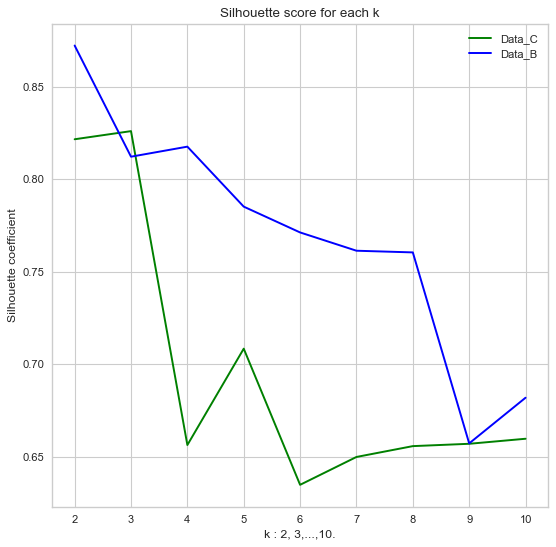

In [19]:
silhouette2 = [] # Assigning a secondary address so it does not add to the previous one in the NB

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit_predict(Dataset_C)
    silhouette_coefficient = silhouette_score(Dataset_C, kmeans.labels_,metric='euclidean')
    silhouette2.append(silhouette_coefficient)

plt.figure(figsize = (8, 8), dpi = 80)    
plt.plot(range(2,11), silhouette2, color="green", label="Data_C")
plt.plot(range(2,11), silhouette, color="blue", label="Data_B")
plt.title("Silhouette score for each k")
plt.legend()
plt.xlabel("k : 2, 3,...,10.")
plt.ylabel("Silhouette coefficient")
#plt.savefig('Images/Silhouette score each k 3_3.png', bbox_inches='tight')
plt.savefig('Images/Silhouette score each k 3_3.pdf')
plt.show()

In [20]:
df_C = Dataset_C
df_C

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.14003044, 0.01079137,
        0.00636943],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.03196347, 0.00359712,
        0.00636943],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.00152207, 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.00304414, 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Silhoutte score: 0.8259602702160408


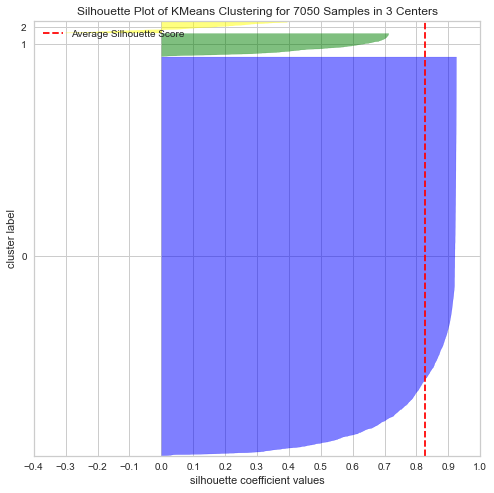

In [21]:
kmeans=KMeans(n_clusters=3, random_state=1)
plot_silhouette(kmeans, df_C, ' k=2', 'Dataset_C 3_3')

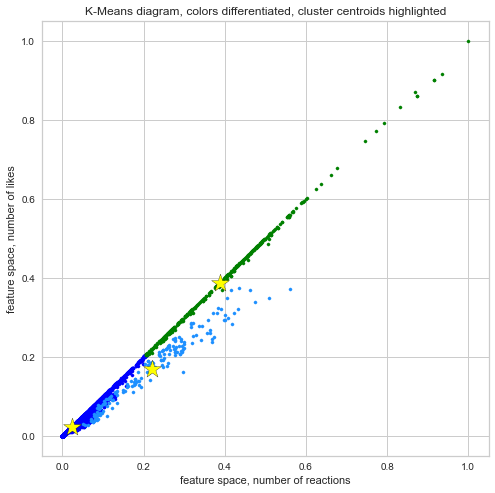

In [22]:
kmeans=KMeans(n_clusters=3, random_state=1)
plot_clusters_with_centers(kmeans, df_C, 0,3, ' k=2', 'Dataset_C 3_3')

- Silhouette Score for each k: In comparison to the previous experiments, when k = 2 was preferable, the best k after scaling is now k = 3. Hence we continue working with it after plotting for the best k.
- Silhouette plot: Compared to before, cluster 0 is still dominating the plot. We now see that the situation of cluster 1 has gotten slightly better, especially regarding any negative dip and false assignments of samples. Cluster 2 is in bad shape, a large section of its samples are probably falsely assigned and it falls very short of the mean score.
- K-Means diagram scatterplot: We see that the new cluster 2 has taken samples from 0 and 1. It dominates the spread of outliers, the number of reactions which are not likes.

## 3.4. <a id='3.4.'></a>[<font size="2">back to top</font>](#top)

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [24]:
selector = VarianceThreshold(threshold = .005)
Dataset_D = selector.fit_transform(Dataset_C)

In [25]:
selector.get_support(indices=True)

array([0, 3], dtype=int64)

- The features included are these with indices 0 and 3.
- That is num_reactions and num_likes.

In [26]:
Dataset_D

array([[0.11231423, 0.09171975],
       [0.03184713, 0.03184713],
       [0.04819533, 0.0433121 ],
       ...,
       [0.00042463, 0.00021231],
       [0.07452229, 0.07409766],
       [0.00360934, 0.00360934]])

In [27]:
print(Dataset_D.var())

0.009378387582748364


Their variance **together** is 0.009378387582748364

In [28]:
np.var(Dataset_D, axis=0, ddof=0)

array([0.00964618, 0.00910547])

Their **individual** variances are 0.00964618 and 0.00910547

While I was uncertain whether the variance of both features together or their individual variances were asked for, I figured to include both.

## 3.5. <a id='3.5.'></a>[<font size="2">back to top</font>](#top)

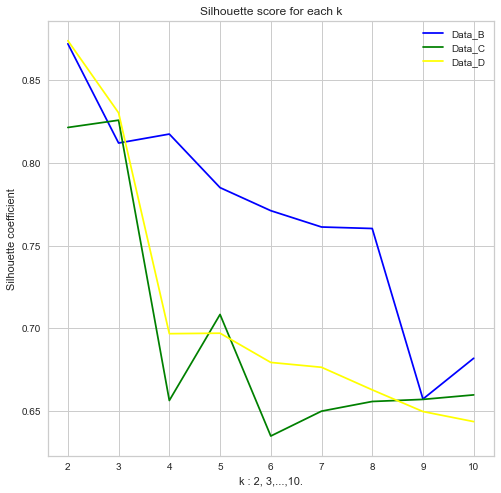

In [29]:
silhouette3 = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit_predict(Dataset_D)
    silhouette_coefficient = silhouette_score(Dataset_D, kmeans.labels_,metric='euclidean')
    silhouette3.append(silhouette_coefficient)

plt.figure(figsize = (8, 8))    
plt.plot(range(2,11), silhouette, color="blue", label="Data_B")
plt.plot(range(2,11), silhouette2, color="green", label="Data_C")
plt.plot(range(2,11), silhouette3, color="yellow", label="Data_D")
plt.title("Silhouette score for each k")
plt.legend()
plt.xlabel("k : 2, 3,...,10.")
plt.ylabel("Silhouette coefficient")
#plt.savefig('Images/Silhouette score each k 3_5.png', bbox_inches='tight')
plt.savefig('Images/Silhouette score each k 3_5.pdf')
plt.show()

Silhoutte score: 0.8740627854592383


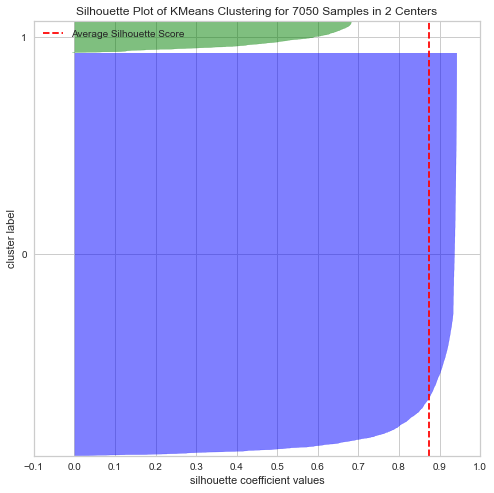

In [30]:
kmeans=KMeans(n_clusters=2, random_state=1)  
plot_silhouette(kmeans, Dataset_D, ' k=2', 'Dataset_D 3_5')

The first cluster got better, we have more values after we have applied the treshold.

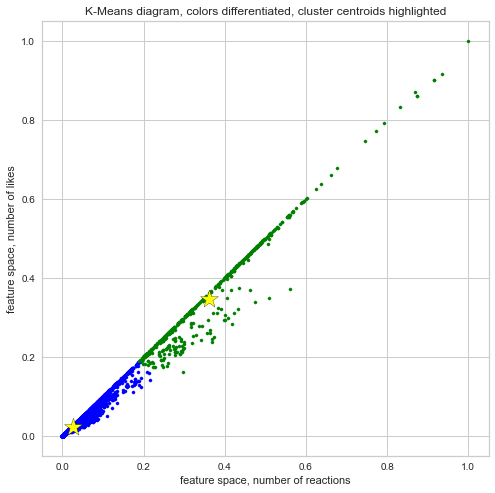

In [31]:
kmeans=KMeans(n_clusters=2, random_state=1)  
plot_clusters_with_centers(kmeans, Dataset_D, 0, 1, ' k=2', 'Dataset_D 3_5')

  <br />
    <br />
      <br />
- Silhouette Score for each k: k=2 got strengthened again after applying the threshold. For comparison's sake, I thus used k=2 in the following silhouette plot. For Dataset_C, the selection of k is a close call. However, to justify why I kept the selection of k=3 in the previous experiment on Dataset_C: It seemed to be the accurate decision at the time and it was asked to select the best current k within that part of the exercise.


- Silhouette plot: Cluster 0 still dominates, but cluster 1 got better. It has more samples after we have applied the treshold, and it enjoys not being in negative space anymore, so pretty certainly there is no cross-assignment present. This comes along with a higher relative accuracy. Relative, because we notice that the mean score has sunken to 0.8740627854592383.

- K-Means diagram scatterplot: The plot now shows a pretty cleanly seperated distribution in comparison to before. Cluster 0 and 1 are mostly separated by total amounts comprised of reactions and likes.

What I notice is that it's a difficult comparison using kmeans. To my understanding because the number of likes is a subset of number of reactions. If we have more likes, we will also have more reactions. Hence the comparison using these graphs is kind of similar. 

In the lectures it was mentioned that it was very important to know what to use when, and the ultimate conclusion here is that kmeans and the subsets of number of reactions are probably not as expressive as we had hoped for. It is probably a good example of this very goal to learn, and I hope it was intended and my conclusion is not too bold, and can be considered part of a fittingly justified response which I have given enough thought to.

As we found out about this here, I conclude an interesting comparison could be comparing number of reactions to the number of responses or the number of shares instead.

## 3.6. <a id='3.6.'></a> <a id='ref8'></a>[<font size="2">back to top</font>](#top)
Similarly as found in ex_07_2_k_means_iris.ipynb from [20] onwards, but I also used scikit-learn as before, and then DelftStack's doc. Here we want to compare, so we need two datasets, the current one (Dataset_D) and the last unscaled one. For this I selected Dataset_B, because it is basically the original one with the usable features.

The order is to fit, predict, take the labels, then create the new columns, then predict the dataframe. The x-axis gets the predict from the column and the y-axis will be the features.

[[8, 9, 10, 11]](#Sources)

In [32]:
# using k=2 and default values from sklearn 
kmeans = KMeans(n_clusters=2, random_state=1, init='k-means++', max_iter=300, tol=0.0001)
# compute cluster centers and predict cluster index for each sample
distr_Dataset_D = kmeans.fit_predict(Dataset_D, sample_weight=None)
distr_Dataset_B = kmeans.fit_predict(Dataset_B, sample_weight=None)
# add the distribution within the clusters of D and B to the full Dataset A
Dataset_A['D_distr_in_clusters'] = distr_Dataset_D
Dataset_A['B_distr_in_clusters'] = distr_Dataset_B

In [33]:
# Check check
Dataset_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status_id            7050 non-null   int64  
 1   status_type          7050 non-null   object 
 2   status_published     7050 non-null   object 
 3   num_reactions        7050 non-null   int64  
 4   num_comments         7050 non-null   int64  
 5   num_shares           7050 non-null   int64  
 6   num_likes            7050 non-null   int64  
 7   num_loves            7050 non-null   int64  
 8   num_wows             7050 non-null   int64  
 9   num_hahas            7050 non-null   int64  
 10  num_sads             7050 non-null   int64  
 11  num_angrys           7050 non-null   int64  
 12  Column1              0 non-null      float64
 13  Column2              0 non-null      float64
 14  Column3              0 non-null      float64
 15  Column4              0 non-null      f

**Starting with the current, latest Dataset_D** 

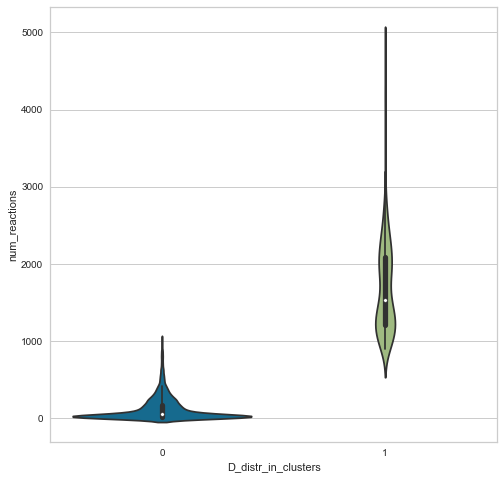

In [34]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='D_distr_in_clusters', y='num_reactions', data=Dataset_A)
#plt.savefig('Images/Violin_D_reactions.png', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_D num_reactions.pdf')
plt.show()

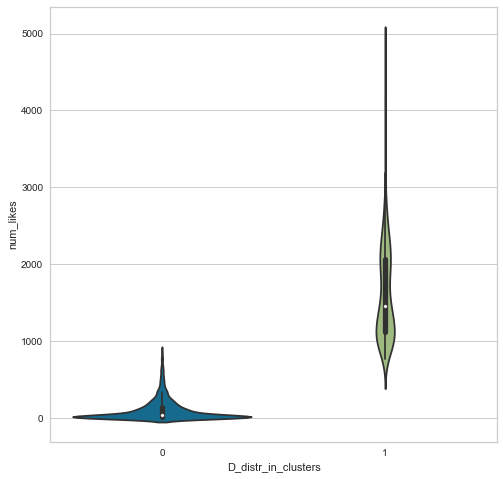

In [35]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='D_distr_in_clusters', y='num_likes', data=Dataset_A)
#plt.savefig('Images/Violinplot Dataset_D num_likes', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_D num_likes.pdf')
plt.show()

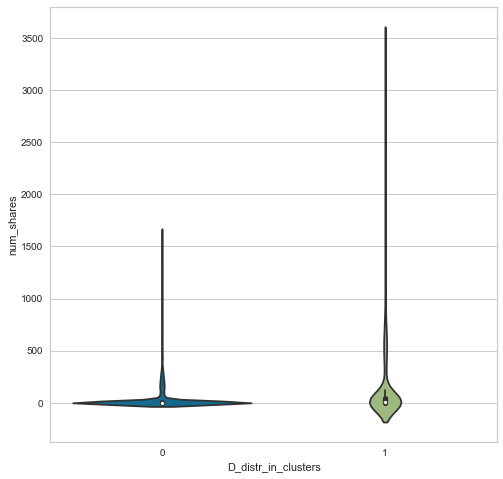

In [36]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='D_distr_in_clusters', y='num_shares', data=Dataset_A)
#plt.savefig('Images/Violinplot Dataset_D num_shares.png', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_D num_shares.pdf')
plt.show()

**Reviewing the old Dataset_B (unscaled values)**

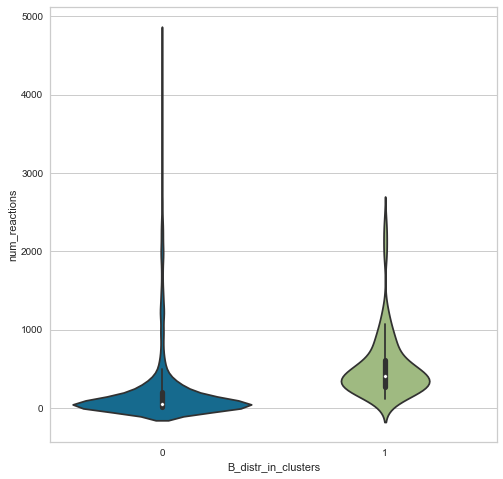

In [37]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='B_distr_in_clusters', y='num_reactions', data=Dataset_A)
#plt.savefig('Images/Violinplot Dataset_B num_reactions', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_B num_reactions.pdf')
plt.show()

<a id='penultimate'></a>

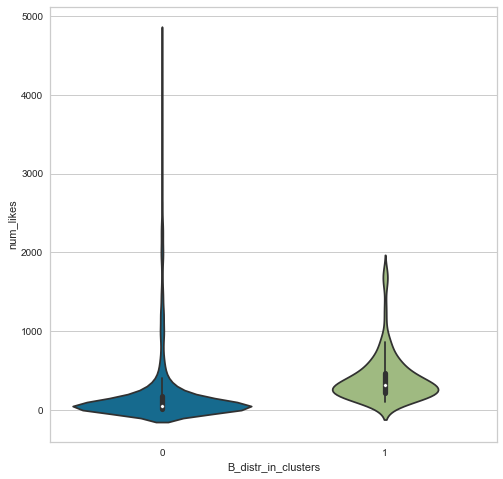

In [38]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='B_distr_in_clusters', y='num_likes', data=Dataset_A)
#plt.savefig('Images/Violinplot Dataset_B num_likes', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_B num_likes.pdf')
plt.show()

[Back to the interpretation](#describepenultimateviolentviolin) 

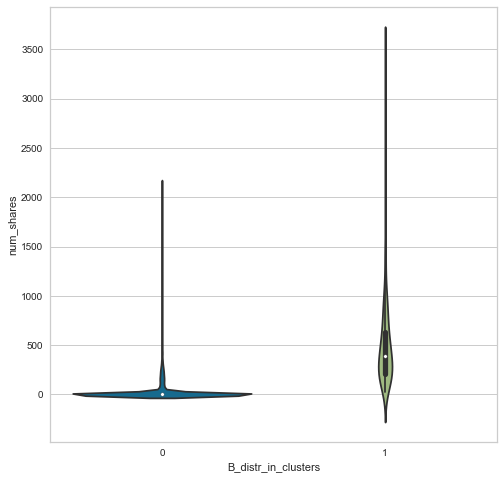

In [39]:
plt.figure(figsize=(8, 8))
violin_plot = sns.violinplot(x='B_distr_in_clusters', y='num_shares', data=Dataset_A)
#plt.savefig('Images/Violinplot Dataset_B num_shares.png', bbox_inches='tight')
plt.savefig('Images/Violinplot Dataset_B num_shares.pdf')
plt.show()

<a id='describepenultimateviolentviolin'></a>

**Interpretation**<a id='ref12'></a>
- After scaling I had a numpy array, which wouldn't work for the plot. This and because we want to use trained information on the full set ("use violin plots for the original data") I used the full Dataset_A as part of the plotting, but the specific trained data for the distribution.
- If we focus on the [penultimate violin plot](#penultimate), we can see the two clusters 0 and 1.
- Here we see how the numbers of likes are distributed within the clusters.
- Cluster 0 shows many outside points and a very low upper adjacent value. Its mean sits pretty low in comparison to its total range, slightly over zero. Its first quartile seems to sit directly on zero, and the lower adjacent value directly with it. It contains a number of values below 0. Its amplitude in width, so where the soup is the thickest in 2-dimensional space, is near the bottom of it. 
- Cluster 1 has less outside points, they are concentrated in a peninsula at the top (may I use this term?). Its upper adjacent value is a bit further from the median than cluster 0's, and its range from third quartile to first quartile sits larger than cluster 0's, with its lower adjacent value elevated from zero. The frequency of data points is more evenly distributed here across the range, so we see more elegant curves (plus our little peninsula at the top, probably with posts that went somewhat viral).

[[12]](#Sources)

<a id='Sources'></a>
### Sources [<font size="2">back to top</font>](#top)
- [[1]](#ref1) https://codefather.tech/blog/pandas-standard-deviation/
- [[2]](#ref2) https://www.scikit-yb.org/en/latest/_modules/yellowbrick/cluster/silhouette.html
- [[3]](#ref3) https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
- [[4]](#ref3) https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
- [[5]](#ref3) https://towardsdatascience.com/understanding-the-impact-of-variance-in-poker-in-life-999a42fb057e
- [[6]](#ref6) https://en.climate-data.org/europe/germany-232/
- [[7]](#ref7) Lecture ML, chapter Preprocessing, "Rule of Thumb" by Prof. Dr. Doerfel
- [[8]](#ref8) Lecture and Solutions in ex_07_2_k_means_iris.ipynb by Prof. Dr. Doerfel
- [[9]](#ref8) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- [[10]](#ref8) https://www.delftstack.com/de/howto/seaborn/seaborn-violinplot-python/
- [[11]](#ref8) https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
- [[12]](#ref12) https://www.delftstack.com/de/howto/seaborn/seaborn-violinplot-python/